Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
df = pd.read_csv("D:\Data Science\Assignments\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [2]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [3]:
df.columns = ["Name", "Murder", "Assault", "UrbanPop", "Rape"]

In [4]:
df.columns

Index(['Name', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.shape

(50, 5)

In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
df.isna().sum()

Name        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
df = df.iloc[:,1:]

In [10]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['Rape'] = LE.fit_transform(df['Rape'])

In [11]:
#df['Murder'].unique()
#df['Assault'].unique()
#df['UrbanPop'].unique()
df['Rape'].unique()

array([26, 46, 40, 21, 45, 44,  6, 13, 41, 33, 23, 10, 31, 25,  8, 19, 15,
       28,  1, 37, 43, 11, 18, 38, 16, 17, 47,  4, 20, 42, 34, 14,  0, 27,
       22, 39,  2, 29,  9, 36, 32, 30,  7, 24, 35,  3,  5, 12],
      dtype=int64)

In [12]:
df[df.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [13]:
# To check correlation
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.625828
Assault,0.801873,1.000000,0.258872,0.688542
UrbanPop,0.069573,0.258872,1.000000,0.438389
Rape,0.625828,0.688542,0.438389,1.000000


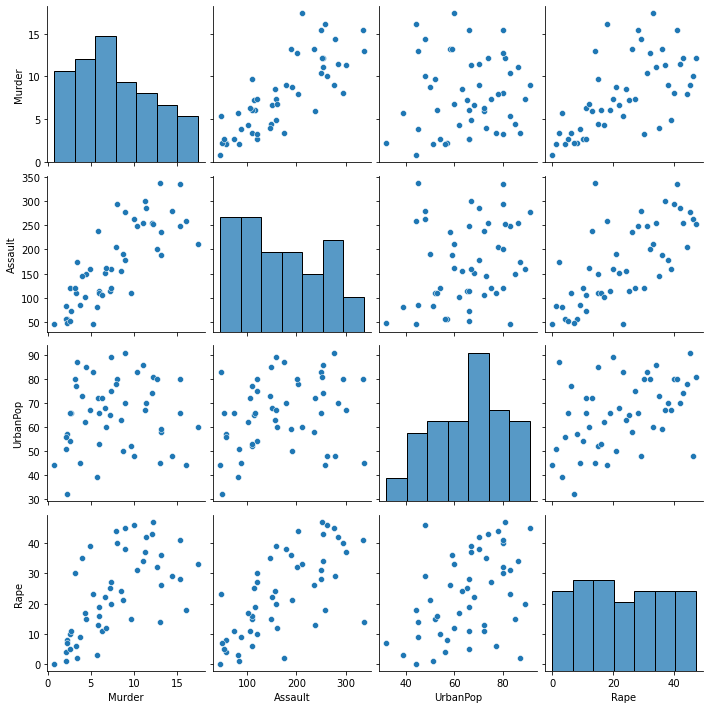

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

# Hierarchy Clustering

In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [16]:
# Normalization Function 
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [17]:
# Normalize data frame (Considering the numerical part of data)
df_norm = norm_func(df.iloc[:,0:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.553191
1,0.554217,0.746575,0.271186,0.978723
2,0.439759,0.852740,0.813559,0.851064
3,0.481928,0.496575,0.305085,0.446809
4,0.493976,0.791096,1.000000,0.957447


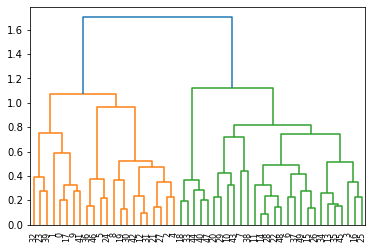

In [18]:
# Create Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [19]:
# Create Clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [20]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [21]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([1, 1, 3, 0, 3, 4, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 2, 3, 0, 3,
       0, 1, 4, 0, 0, 3, 0, 0, 3, 3, 1, 2, 0, 0, 4, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 4, 2, 0, 0], dtype=int64)

In [22]:
df['h_clusterid'] = y_hc

In [23]:
df1 = df.sort_values("h_clusterid")
df1.iloc[:,[0,-1]].head()

,Murder,h_clusterid
49,6.8,0
26,4.3,0
22,2.7,0
28,2.1,0
20,4.4,0


In [24]:
df['h_clusterid'].unique()

array([1, 3, 0, 4, 2], dtype=int64)

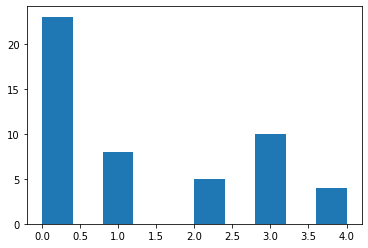

In [25]:
import matplotlib.pyplot as plt
plt.hist(df['h_clusterid'])
plt.show()

# K_Means Clustering

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
#standardized Dataset using scale
array = df.values

In [28]:
from sklearn.preprocessing import scale
scaled = scale(array)
scaled

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493, -0.19791075],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306, -0.19791075],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362,  1.21573747],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.90473486],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315,  1.21573747],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  1.92256157],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.90473486],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.90473486],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352,  1.21573747],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427, -0.19791075],
       [-0.57702994, -1.51224105,  1.21848371, -0.00582479, -0.90473486],
       [-1.20322802, -0.61527217, -0.80534376, -0.95235358, -0.90473486],
       [ 0.60578867,  0.94836277,  1.21848371,  0.57665446,  1.21573747],
       [-0.13637203, -0.70012057, -0.0

In [29]:
# Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 0.79078716, -0.52619514,  0.21260493, -0.19791075],
       [ 1.11805959, -1.22406668,  1.66880306, -0.19791075],
       [ 1.49381682,  1.00912225,  1.23194362,  1.21573747],
       [ 0.23321191, -1.08449238, -0.15144461, -0.90473486],
       [ 1.2756352 ,  1.77678094,  1.59599315,  1.21573747],
       [ 0.40290872,  0.86954794,  1.52318324,  1.92256157],
       [-0.73648418,  0.79976079, -1.2435932 , -0.90473486],
       [ 0.81502956,  0.45082502, -0.73392386, -0.90473486],
       [ 1.99078607,  1.00912225,  1.30475352,  1.21573747],
       [ 0.48775713, -0.38662083,  0.72227427, -0.19791075],
       [-1.51224105,  1.21848371, -0.00582479, -0.90473486],
       [-0.61527217, -0.80534376, -0.95235358, -0.90473486],
       [ 0.94836277,  1.21848371,  0.57665446,  1.21573747],
       [-0.70012057, -0.03768506,  0.13979502, -0.90473486],
       [-1.39102904, -0.5959823 , -1.09797339, -0.90473486],
       [-0.67587817,  0.03210209, -0.29706442, -0.90473486],
       [-0.74860538, -0.

In [30]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_df)
kmeans.inertia_

49.85143398584086

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


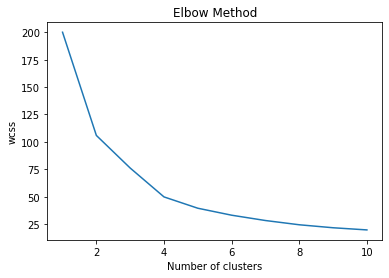

In [31]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [32]:
wcss

[200.0,
 105.90447880716356,
 76.18348683774381,
 49.85143398584086,
 39.53074532743696,
 33.17109645832079,
 28.321193926881833,
 24.444292555891373,
 21.726289210700042,
 19.756412368152958]

In [33]:
# Build Cluster Algorithm
cluster_new = KMeans(4, random_state = 42)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [34]:
cluster_new.labels_

array([1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       0, 1, 2, 3, 0, 2, 3, 0, 2, 2, 1, 3, 0, 0, 2, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 2, 3, 0, 0])

In [35]:
# Assign Cluster to the dataset
df['clusterid_new'] = cluster_new.labels_
cluster_new.cluster_centers_  # these are standardized value

array([[-0.54040592,  0.50008654, -0.47266478, -0.90473486],
       [ 0.90930557, -0.86737678,  0.35013475, -0.27644676],
       [ 0.86264856,  0.80973038,  1.16953513,  1.41768721],
       [-1.10739293, -1.20313054, -1.14894032, -0.19791075]])

In [36]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.364706,126.176471,72.705882,16.588235,0.000000
1,1,13.500000,245.777778,53.111111,27.888889,0.888889
2,2,9.964286,241.928571,77.142857,39.142857,3.285714
3,3,3.720000,79.400000,48.300000,7.300000,1.000000


In [37]:
df[df['clusterid_new'] == 3]
#df[df['clusterid_new'] == 0]

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
11,2.6,120,54,10,0,3
14,2.2,56,57,8,0,3
16,9.7,109,52,15,0,3
18,2.1,83,51,1,2,3
25,6.0,109,53,16,0,3
28,2.1,57,56,4,0,3
33,0.8,45,44,0,2,3
40,3.8,86,45,9,2,3
44,2.2,48,32,7,2,3
47,5.7,81,39,3,2,3


# DBSCAN : Density Base Scan

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
array = df.values

In [40]:
st_scaler = StandardScaler()
X = st_scaler.fit_transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493, -0.19791075,
        -0.29769636],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306, -0.19791075,
        -0.29769636],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362,  1.21573747,
         0.57788117],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.90473486,
        -0.29769636],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315,  1.21573747,
         0.57788117],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  1.92256157,
         0.57788117],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.90473486,
        -1.17327388],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.90473486,
        -1.17327388],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352,  1.21573747,
         0.57788117],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427, -0.19791075,
        -0.29769636],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [41]:
dbscan = DBSCAN(eps = 5 , min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [42]:
# Noisy Samples are given the label: -1
print(dbscan.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
cl = pd.DataFrame(dbscan.labels_, columns = ['clusters'])

In [44]:
cl

,clusters
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [45]:
clustered = pd.concat([df,cl], axis =1)
clustered

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusters
0,13.2,236,58,26,1,1,0
1,10.0,263,48,46,1,1,0
2,8.1,294,80,40,3,2,0
3,8.8,190,50,21,0,1,0
4,9.0,276,91,45,3,2,0
5,7.9,204,78,44,4,2,0
6,3.3,110,77,6,0,0,0
7,5.9,238,72,13,0,0,0
8,15.4,335,80,41,3,2,0
9,17.4,211,60,33,1,1,0


In [46]:
# -1 Shows outlier / extreme values for the dataset
clustered[clustered['clusters'] == -1].head()

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,clusters


In [47]:
clustered.mean()

Murder             7.788
Assault          170.760
UrbanPop          65.540
Rape              23.080
h_clusterid        1.280
clusterid_new      1.340
clusters           0.000
dtype: float64

In [48]:
p = clustered.iloc[:,-1]
q = clustered.iloc[:,-2]
r = clustered.iloc[:,-3]
#print(p)
#print(q)
#print(r)

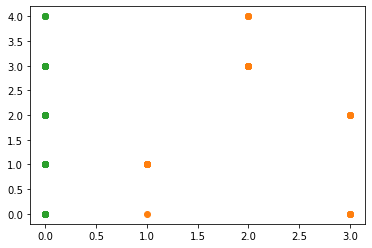

In [49]:
plt.scatter(p,q)
plt.scatter(q,r)
plt.scatter(p,r)
plt.show()

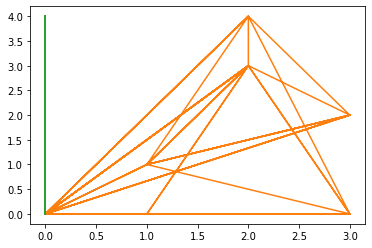

In [50]:
plt.plot(p,q)
plt.plot(q,r)
plt.plot(p,r)
plt.show()

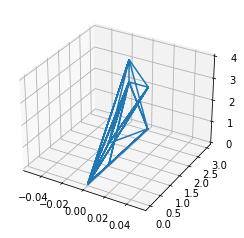

In [51]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

# Inferences:

In [52]:
# In clusters column there is outiers/extreme values exists in the given data shows with -1.